# Развлекательное приложение "Procrastinate Pro+"

**Описание проекта**<br>
<br>
Предоставлены данные развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. <br>
<br>
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:<br>
•	лог сервера с данными об их посещениях,<br>
•	выгрузка их покупок за этот период,<br>
•	рекламные расходы.<br>
<br>
**Цель исследования** — разобраться в причинах и помочь компании выйти в плюс.<br>

**Изучить**:<br>
•	откуда приходят пользователи и какими устройствами они пользуются,<br>
•	сколько стоит привлечение пользователей из различных рекламных каналов;<br>
•	сколько денег приносит каждый клиент,<br>
•	когда расходы на привлечение клиента окупаются,<br>
•	какие факторы мешают привлечению клиентов.


**Описание данных**<br>
<br>
В вашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, <br> orders_info_short.csv — информацию о покупках, а costs_info_short.csv — информацию о расходах на рекламу.<br>
<br>
Структура `visits_info_short.csv`<br>
<br>
•	`User Id` — уникальный идентификатор пользователя,<br>
•	`Region` — страна пользователя,<br>
•	`Device` — тип устройства пользователя,<br>
•	`Channel` — идентификатор источника перехода,<br>
•	`Session Start` — дата и время начала сессии,<br>
•	`Session End` — дата и время окончания сессии.<br>
<br>
Структура `orders_info_short.csv`<br>
<br>
•	`User Id` — уникальный идентификатор пользователя,<br>
•	`Event Dt` — дата и время покупки,<br>
•	`Revenue` — сумма заказа.<br>
<br>
Структура `costs_info_short.csv`<br>
<br>
•	`Channel` — идентификатор рекламного источника,<br>
•	`Dt` — дата проведения рекламной кампании,<br>
•	`Costs` — расходы на эту кампанию.<br>


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-подготовка-их-к-анализу" data-toc-modified-id="Загрузка-данных-и-подготовка-их-к-анализу-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных и подготовка их к анализу</a></span><ul class="toc-item"><li><span><a href="#Создание-переменных-с-данными-о-визитах,-заказах-и-рекламных-тратах." data-toc-modified-id="Создание-переменных-с-данными-о-визитах,-заказах-и-рекламных-тратах.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Создание переменных с данными о визитах, заказах и рекламных тратах.</a></span></li><li><span><a href="#Подготовка-данных-к-анализу" data-toc-modified-id="Подготовка-данных-к-анализу-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка данных к анализу</a></span><ul class="toc-item"><li><span><a href="#Работа-с-датасетом-sessions" data-toc-modified-id="Работа-с-датасетом-sessions-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Работа с датасетом <code>sessions</code></a></span></li><li><span><a href="#Работа-с-датасетом-orders" data-toc-modified-id="Работа-с-датасетом-orders-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Работа с датасетом <code>orders</code></a></span></li><li><span><a href="#Работа-с-датасетом-costs" data-toc-modified-id="Работа-с-датасетом-costs-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Работа с датасетом <code>costs</code></a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Задание-функций-для-расчета-и-анализа-LTV,-ROI,-удержания-и-конверсии" data-toc-modified-id="Задание-функций-для-расчета-и-анализа-LTV,-ROI,-удержания-и-конверсии-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задание функций для расчета и анализа LTV, ROI, удержания и конверсии</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Создайте-пользовательские-профили.-Определите-минимальную-и-максимальную-даты-привлечения-пользователей." data-toc-modified-id="Создайте-пользовательские-профили.-Определите-минимальную-и-максимальную-даты-привлечения-пользователей.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Создайте пользовательские профили. Определите минимальную и максимальную даты привлечения пользователей.</a></span></li><li><span><a href="#Выясните,-из-каких-стран-пользователи-приходят-в-приложение-и-на-какую-страну-приходится-больше-всего-платящих-пользователей.-Постройте-таблицу,-отражающую-количество-пользователей-и-долю-платящих-из-каждой-страны." data-toc-modified-id="Выясните,-из-каких-стран-пользователи-приходят-в-приложение-и-на-какую-страну-приходится-больше-всего-платящих-пользователей.-Постройте-таблицу,-отражающую-количество-пользователей-и-долю-платящих-из-каждой-страны.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.</a></span></li><li><span><a href="#Узнайте,-какими-устройствами-пользуются-клиенты-и-какие-устройства-предпочитают-платящие-пользователи.-Постройте-таблицу,-отражающую-количество-пользователей-и-долю-платящих-для-каждого-устройства." data-toc-modified-id="Узнайте,-какими-устройствами-пользуются-клиенты-и-какие-устройства-предпочитают-платящие-пользователи.-Постройте-таблицу,-отражающую-количество-пользователей-и-долю-платящих-для-каждого-устройства.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.</a></span></li><li><span><a href="#Изучите-рекламные-источники-привлечения-и-определите-каналы,-из-которых-пришло-больше-всего-платящих-пользователей.-Постройте-таблицу,-отражающую-количество-пользователей-и-долю-платящих-для-каждого-канала-привлечения." data-toc-modified-id="Изучите-рекламные-источники-привлечения-и-определите-каналы,-из-которых-пришло-больше-всего-платящих-пользователей.-Постройте-таблицу,-отражающую-количество-пользователей-и-долю-платящих-для-каждого-канала-привлечения.-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Маркетинг</a></span><ul class="toc-item"><li><span><a href="#Посчитайте-общую-сумму-расходов-на-маркетинг.-Выясните,-как-траты-распределены-по-источникам.-Визуализируйте-изменения-метрик-во-времени." data-toc-modified-id="Посчитайте-общую-сумму-расходов-на-маркетинг.-Выясните,-как-траты-распределены-по-источникам.-Визуализируйте-изменения-метрик-во-времени.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Посчитайте общую сумму расходов на маркетинг. Выясните, как траты распределены по источникам. Визуализируйте изменения метрик во времени.</a></span></li><li><span><a href="#Узнайте,-сколько-в-среднем-стоило-привлечение-одного-пользователя-из-каждого-источника.-Рассчитайте-средний-CAC-на-одного-пользователя-для-всего-проекта-и-для-каждого-источника-трафика.-Используйте-профили-пользователей." data-toc-modified-id="Узнайте,-сколько-в-среднем-стоило-привлечение-одного-пользователя-из-каждого-источника.-Рассчитайте-средний-CAC-на-одного-пользователя-для-всего-проекта-и-для-каждого-источника-трафика.-Используйте-профили-пользователей.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Узнайте, сколько в среднем стоило привлечение одного пользователя из каждого источника. Рассчитайте средний CAC на одного пользователя для всего проекта и для каждого источника трафика. Используйте профили пользователей.</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Оценка-окупаемости-рекламы" data-toc-modified-id="Оценка-окупаемости-рекламы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Оценка окупаемости рекламы</a></span><ul class="toc-item"><li><span><a href="#Проанализируйте-общую-окупаемость-рекламы.-Постройте-графики-LTV-и-ROI,-а-также-графики-динамики-LTV,-CAC-и-ROI." data-toc-modified-id="Проанализируйте-общую-окупаемость-рекламы.-Постройте-графики-LTV-и-ROI,-а-также-графики-динамики-LTV,-CAC-и-ROI.-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Проанализируйте общую окупаемость рекламы. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.</a></span></li><li><span><a href="#Проанализируйте-окупаемость-рекламы-с-разбивкой-по-устройствам.-Постройте-графики-LTV-и-ROI,-а-также-графики-динамики-LTV,-CAC-и-ROI.¶" data-toc-modified-id="Проанализируйте-окупаемость-рекламы-с-разбивкой-по-устройствам.-Постройте-графики-LTV-и-ROI,-а-также-графики-динамики-LTV,-CAC-и-ROI.¶-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.¶</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проанализируйте-окупаемость-рекламы-с-разбивкой-по-рекламным-каналам.-Постройте-графики-LTV-и-ROI,-а-также-графики-динамики-LTV,-CAC-и-ROI." data-toc-modified-id="Проанализируйте-окупаемость-рекламы-с-разбивкой-по-рекламным-каналам.-Постройте-графики-LTV-и-ROI,-а-также-графики-динамики-LTV,-CAC-и-ROI.-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.</a></span></li><li><span><a href="#Проанализируйте-окупаемость-рекламы-с-разбивкой-по-странам.-Постройте-графики-LTV-и-ROI,-а-также-графики-динамики-LTV,-CAC-и-ROI." data-toc-modified-id="Проанализируйте-окупаемость-рекламы-с-разбивкой-по-странам.-Постройте-графики-LTV-и-ROI,-а-также-графики-динамики-LTV,-CAC-и-ROI.-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.</a></span></li><li><span><a href="#Постройте-и-изучите-графики-конверсии-и-удержания-с-разбивкой-по-устройствам,-странам,-рекламным-каналам." data-toc-modified-id="Постройте-и-изучите-графики-конверсии-и-удержания-с-разбивкой-по-устройствам,-странам,-рекламным-каналам.-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Постройте и изучите графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.</a></span><ul class="toc-item"><li><span><a href="#Изучим-графики-конверсии-и-удержания-с-разбивкой-по-устройствам-(без-учета-канала-'organic')" data-toc-modified-id="Изучим-графики-конверсии-и-удержания-с-разбивкой-по-устройствам-(без-учета-канала-'organic')-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>Изучим графики конверсии и удержания с разбивкой по устройствам (без учета канала 'organic')</a></span></li><li><span><a href="#Изучим-графики-конверсии-и-удержания-с-разбивкой-по-странам-(без-учета-канала-'organic')" data-toc-modified-id="Изучим-графики-конверсии-и-удержания-с-разбивкой-по-странам-(без-учета-канала-'organic')-5.5.2"><span class="toc-item-num">5.5.2&nbsp;&nbsp;</span>Изучим графики конверсии и удержания с разбивкой по странам (без учета канала 'organic')</a></span></li><li><span><a href="#Изучим-графики-конверсии-и-удержания-по-рекламным-каналам-(без-учета-канала-'organic')" data-toc-modified-id="Изучим-графики-конверсии-и-удержания-по-рекламным-каналам-(без-учета-канала-'organic')-5.5.3"><span class="toc-item-num">5.5.3&nbsp;&nbsp;</span>Изучим графики конверсии и удержания по рекламным каналам (без учета канала 'organic')</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.5.4"><span class="toc-item-num">5.5.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span><ul class="toc-item"><li><span><a href="#Причины-неэффективности-привлечения-пользователей." data-toc-modified-id="Причины-неэффективности-привлечения-пользователей.-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Причины неэффективности привлечения пользователей.</a></span></li><li><span><a href="#Рекомендации-для-отдела-маркетинга-для-повышения-эффективности." data-toc-modified-id="Рекомендации-для-отдела-маркетинга-для-повышения-эффективности.-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Рекомендации для отдела маркетинга для повышения эффективности.</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Загрузка данных и подготовка их к анализу

### Создание переменных с данными о визитах, заказах и рекламных тратах. 

Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Прочитаем файлы с данными

In [2]:
sessions = pd.read_csv('./datasets/visits_info_short.csv', sep = ',')
orders = pd.read_csv('./datasets/orders_info_short.csv', sep = ',')
costs = pd.read_csv('./datasets/costs_info_short.csv', sep = ',')  

### Подготовка данных к анализу

#### Работа с датасетом `sessions`

Посмотрим общую информацию, проверим на пропуски и дубликаты

In [3]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
sessions.isna().sum()

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

In [5]:
sessions.duplicated().sum()

0

Преобразуем названия столбцов: приведем к нижнему регистру и змеиному стилю

In [6]:
sessions.columns = sessions.columns.str.lower().str.replace(' ', '_')
sessions.head(2)

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35


Переведем формат даты  из `object` в `datetime64`

In [7]:
sessions['session_start'] = pd.to_datetime(sessions['session_start'])
sessions['session_end'] = pd.to_datetime(sessions['session_end'])

#### Работа с датасетом `orders`

Посмотрим общую информацию, проверим на пропуски и дубликаты

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [9]:
orders.isna().sum()

User Id     0
Event Dt    0
Revenue     0
dtype: int64

In [10]:
orders.duplicated().sum()

0

Преобразуем названия столбцов: приведем к нижнему регистру и змеиному стилю

In [11]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
orders.head(2)

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99


Переведем формат даты  из `object` в `datetime64`

In [12]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

#### Работа с датасетом `costs`

Посмотрим общую информацию, проверим на пропуски и дубликаты

In [13]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [14]:
costs.isna().sum()

dt         0
Channel    0
costs      0
dtype: int64

In [15]:
costs.duplicated().sum()

0

Приведем к нижнему регистру названия столбцов

In [16]:
costs.columns = costs.columns.str.lower()
costs.head(2)

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1


Преобразуем формат даты 

In [17]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

### Вывод

Изучили общую информацию:<br>
1. Датасеты проверены на пропуски и дубликаты;<br>
2. Названия столбцов приведены к нижнему регистру и пробелы заменены "змеиным стилем";<br>
3. Изменен формат даты из object в datetime64 и  в dt.date

## Задание функций для расчета и анализа LTV, ROI, удержания и конверсии

**Функция для получения пользовательских профилей**

In [18]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            # проверяем, встречается ли каждый пользователь
            # среди тех, кто совершил событие event
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC


**Функция для расчета удержания**

In [19]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


**Функция для расчета конверсии**

In [20]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Функция для расчета LTV и  ROI**

In [21]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

**Функция для визуализации удержания**

In [22]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 


**Функция для визуализации конверсии**

In [23]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Функция для визуализации LTV и ROI**

In [24]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

**Функция для сглаживания датафрейма**

In [25]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

## Исследовательский анализ данных

### Создайте пользовательские профили. Определите минимальную и максимальную даты привлечения пользователей.

In [26]:
events = None
users = get_profiles(sessions, orders, events, costs, event_names=[])

In [27]:
users.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [28]:
users.describe(include=['object','datetime'])

,first_ts,channel,device,region,dt,month
count,150008,150008,150008,150008,150008,150008
unique,149236,11,4,4,180,6
top,2019-10-11 21:31:40,organic,iPhone,United States,2019-09-28,2019-05-01 00:00:00
freq,2,56439,54479,100002,1256,27111
first,2019-05-01 00:00:41,NaN,NaN,NaN,NaN,2019-05-01 00:00:00
last,2019-10-27 23:59:04,NaN,NaN,NaN,NaN,2019-10-01 00:00:00


In [29]:
users['channel'].unique()

array(['FaceBoom', 'organic', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [30]:
users['device'].unique()

array(['Mac', 'iPhone', 'PC', 'Android'], dtype=object)

In [31]:
users['region'].unique()

array(['United States', 'France', 'Germany', 'UK'], dtype=object)

In [32]:
users['payer'].value_counts()

False    141127
True       8881
Name: payer, dtype: int64

**Вывод**: 

Созданы пользовательские профили. Минимальной датой привличения пользователя является 1 мая 2019 года(first), а максимальной - 27 октября 2019(last), что и соответствует датам в описании проекта. Количество уникальных пользователей составляет 149236 человек, которые привлекались по 11 каналам, с 4х устройств и из 4х стран.

### Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [33]:
(users.groupby('region')
.agg({'payer': ['count', 'mean']})
.sort_values(by =('payer','mean'), ascending = False))

payer          
                count      mean
region                         
United States  100002  0.069019
Germany         14981  0.041119
UK              17575  0.039829
France          17450  0.037994

**Вывод**: 

В приложение приходят пользователи из стран:'United States', 'Germany', 'UK', 'France'. Наибольшее количество платящих пользователей приходится на  'United States' - 6,9%.

### Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [34]:
(users.groupby('device')
.agg({'payer': ['count', 'mean']})
.sort_values(by =('payer','mean'), ascending = False))

payer          
         count      mean
device                  
Mac      30042  0.063644
iPhone   54479  0.062079
Android  35032  0.058518
PC       30455  0.050468

**Вывод**: 

В приложение приходят пользователи с устройств:'Mac', 'iPhone', 'PC', 'Android'. Наибольшее количество платящих пользователей приходится на  'Mac' - 6,36%.

### Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [35]:
(users.groupby('channel')
.agg({'payer': ['count', 'mean']})
.sort_values(by =('payer','mean'), ascending = False))

payer          
                    count      mean
channel                            
FaceBoom            29144  0.122049
AdNonSense           3880  0.113402
lambdaMediaAds       2149  0.104700
TipTop              19561  0.096007
RocketSuperAds       4448  0.079137
WahooNetBanner       8553  0.052964
YRabbit              4312  0.038265
MediaTornado         4364  0.035747
LeapBob              8553  0.030633
OppleCreativeMedia   8605  0.027077
organic             56439  0.020553

**Вывод**: 

В приложение приходят пользователи из каналов привличения:'FaceBoom', 'organic', 'AdNonSense', 'YRabbit', 'MediaTornado',
'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner','OppleCreativeMedia', 'lambdaMediaAds'. Наибольшее количество платящих пользователей приходится на 'FaceBoom' - 12,2%.

### Вывод

На данном шаге созданы пользовательские профили. Минимальной датой привличения пользователя является 1 мая 2019 года(first), а максимальной - 27 октября 2019(last). Количество уникальных пользователей составляет 149236 человек.<br>
<br>
В приложение приходят пользователи:
- из стран:'United States', 'Germany', 'UK', 'France'. Наибольшее количество платящих пользователей приходится на 'United States' - 6,9%. <br>
- с устройств:'Mac', 'iPhone', 'PC', 'Android'. Наибольшее количество платящих пользователей приходится на 'Mac' - 6,36%. <br>
-  из каналов привличения:'FaceBoom', 'organic', 'AdNonSense', 'YRabbit', 'MediaTornado', 'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner','OppleCreativeMedia', 'lambdaMediaAds'. Наибольшее количество платящих пользователей приходится на 'FaceBoom' - 12,2%.

## Маркетинг

### Посчитайте общую сумму расходов на маркетинг. Выясните, как траты распределены по источникам. Визуализируйте изменения метрик во времени.

Посчитаем общую сумму расходов на маркетинг.

In [36]:
users['acquisition_cost'].sum()

105497.29999999999

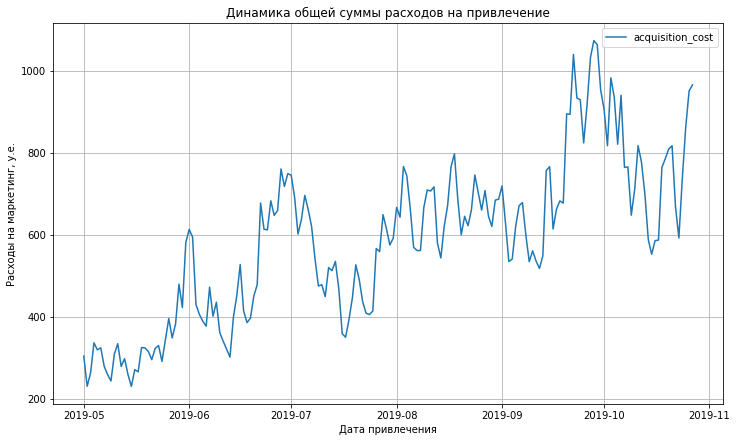

In [37]:
users.pivot_table(
    index='dt',  
    values='acquisition_cost', 
    aggfunc='sum',
).plot(figsize=(12, 7), grid=True)
plt.xlabel('Дата привлечения')
plt.ylabel('Расходы на маркетинг, у.е.')
plt.title('Динамика общей суммы расходов на привлечение');

**Вывод:** Имеется тенденция роста расходов на привлечение пользователей в приложение со временем. Расходы за полгода возрасли почти в 3,5 раза.

Распределение затрат по каналам привлечения 

In [38]:
(users.groupby('channel')
.agg({'acquisition_cost': 'sum'})
.sort_values(by ='acquisition_cost', ascending = False))

,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


**Вывод:** Наибольшие расходы на привлечение пользователей приходятся на 'TipTop' и 'FaceBoom', что составляет 54751,3 и 32445,6 у.е. соответственно. Затраты на остальные каналы привлечения не превышает 5152 у.е.

Визуализируем расходы на рекламу

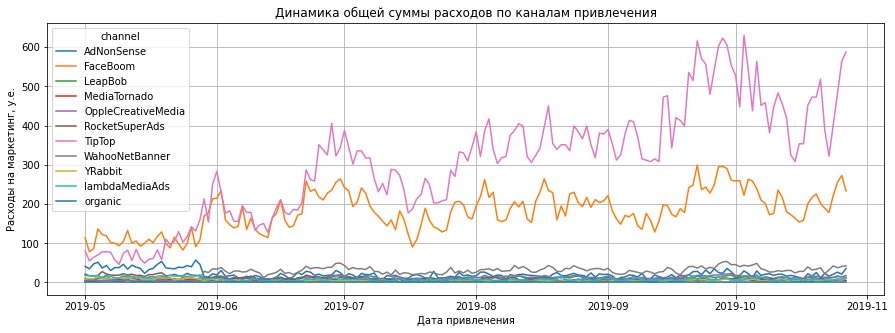

In [39]:
users.pivot_table(
    index='dt',  
    columns='channel', 
    values='acquisition_cost', 
    aggfunc='sum',
).plot(figsize=(15, 5), grid=True)
plt.xlabel('Дата привлечения')
plt.ylabel('Расходы на маркетинг, у.е.')
plt.title('Динамика общей суммы расходов по каналам привлечения');

На графике видно, что имеется тенденция роста затрат на привлечение пользователй в канале 'TipTop'. По остальным канала динамика расходов стабильна(<50 у.е.), но канал 'FaceBoom' лидирует по расходам среди "стабильных" по расходам каналов примерно 200 у.е.

**Вывод**: 

Общая сумма расходов на маркетинг составила 105497.3 у.е. Наибольшие траты пришлись на маркетинг по каналам привлечения: 'TipTop' и 'FaceBoom'. 

### Узнайте, сколько в среднем стоило привлечение одного пользователя из каждого источника. Рассчитайте средний CAC на одного пользователя для всего проекта и для каждого источника трафика. Используйте профили пользователей.

Посмотрим на затраты и количество пользователей в каждом канале привлечения

In [40]:
t=(users.groupby('channel')
.agg({'acquisition_cost': 'sum', 'user_id':'count'})
.sort_values(by ='acquisition_cost', ascending = False)).reset_index()
t

,channel,acquisition_cost,user_id
0,TipTop,54751.30,19561
1,FaceBoom,32445.60,29144
2,WahooNetBanner,5151.00,8553
3,AdNonSense,3911.25,3880
4,OppleCreativeMedia,2151.25,8605
5,RocketSuperAds,1833.00,4448
6,LeapBob,1797.60,8553
7,lambdaMediaAds,1557.60,2149
8,MediaTornado,954.48,4364
9,YRabbit,944.22,4312


Рассчитаем затраты на одного пользователя в каждом канале привлечения(user_cost)

In [41]:
t['user_cost'] = t['acquisition_cost']/t['user_id']
t

,channel,acquisition_cost,user_id,user_cost
0,TipTop,54751.30,19561,2.799003
1,FaceBoom,32445.60,29144,1.113286
2,WahooNetBanner,5151.00,8553,0.602245
3,AdNonSense,3911.25,3880,1.008054
4,OppleCreativeMedia,2151.25,8605,0.250000
5,RocketSuperAds,1833.00,4448,0.412095
6,LeapBob,1797.60,8553,0.210172
7,lambdaMediaAds,1557.60,2149,0.724802
8,MediaTornado,954.48,4364,0.218717
9,YRabbit,944.22,4312,0.218975


Рассчитаем средний CAC на одного пользователя для всего проекта

In [42]:
cac_user=t['acquisition_cost'].sum()/t['user_id'].sum()
cac_user

0.7032778251826491

Рассчитаем средний CAC на одного пользователя для всего проекта, за исключением органических пользователей

In [43]:
t=t[:10] 
cac_user=t['acquisition_cost'].sum()/t['user_id'].sum()
cac_user

1.1274813239427464

Величина среднего CAC на одного пользователя для проекта без учета органических пользователей значительно возросла(на 60%)

Рассчитаем средний CAC на одного пользователя по каналам привлечения 

In [44]:
users_q=users.query('channel != "organic"')
(users_q.pivot_table(
    index='channel', values='acquisition_cost', aggfunc='mean')
.sort_values(by ='acquisition_cost', ascending = False).reset_index())

,channel,acquisition_cost
0,TipTop,2.799003
1,FaceBoom,1.113286
2,AdNonSense,1.008054
3,lambdaMediaAds,0.724802
4,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
6,OppleCreativeMedia,0.250000
7,YRabbit,0.218975
8,MediaTornado,0.218717
9,LeapBob,0.210172


Посмотрим динамику САС по каналам привлечения 

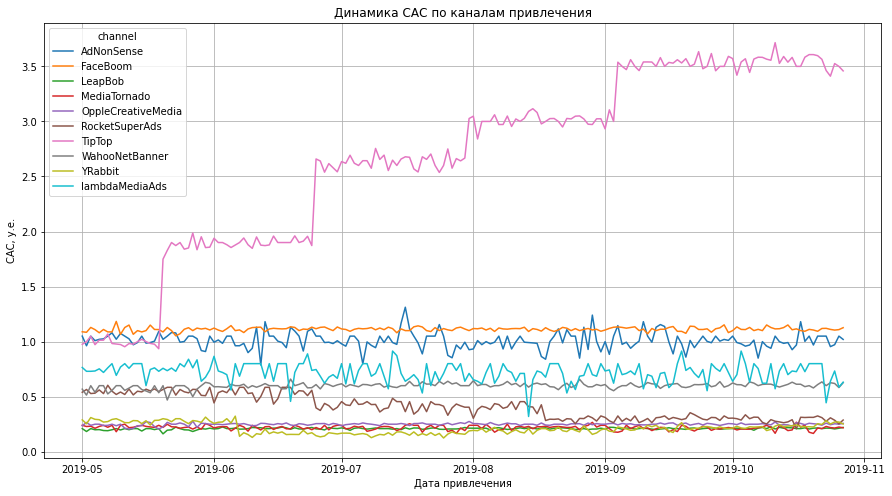

In [45]:
users_q.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(15, 8))
plt.ylabel('CAC, у.е.')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения');

**Вывод**: 

Произведен рассчет затрат на одного пользователя в каждом канале привлечения, средний CAC на одного пользователя для всего проекта составляет 1,127 у.е. Рассчитан средний САС для каждого источника трафика. Динамика САС по каналам привлечения отображена на графике.Динамика САС всех каналов, за исключением 'Tip Top', стабильна, по каналу 'Tip Top' скачкообразно растет и в последний месяц наблюдений превышает САС других каналов почти в 3,5 раза. Наибольшие средние значения `САС` показывают источники 'Tip Top' и 'FaceBoom', а наименьшие -'LeapBob'. 

### Вывод

Общая сумма расходов на маркетинг составила 105497.3 у.е., а на одного пользователя - 1.127 у.е. Наибольшие траты пришлись на маркетинг по каналу привлечения 'TipTop', а наименьшие - на 'LeapBob' . По остальным каналам траты на рекламу гораздо меньше( в 3 и более раз).

## Оценка окупаемости рекламы

### Проанализируйте общую окупаемость рекламы. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [46]:
observation_date = datetime(2020, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

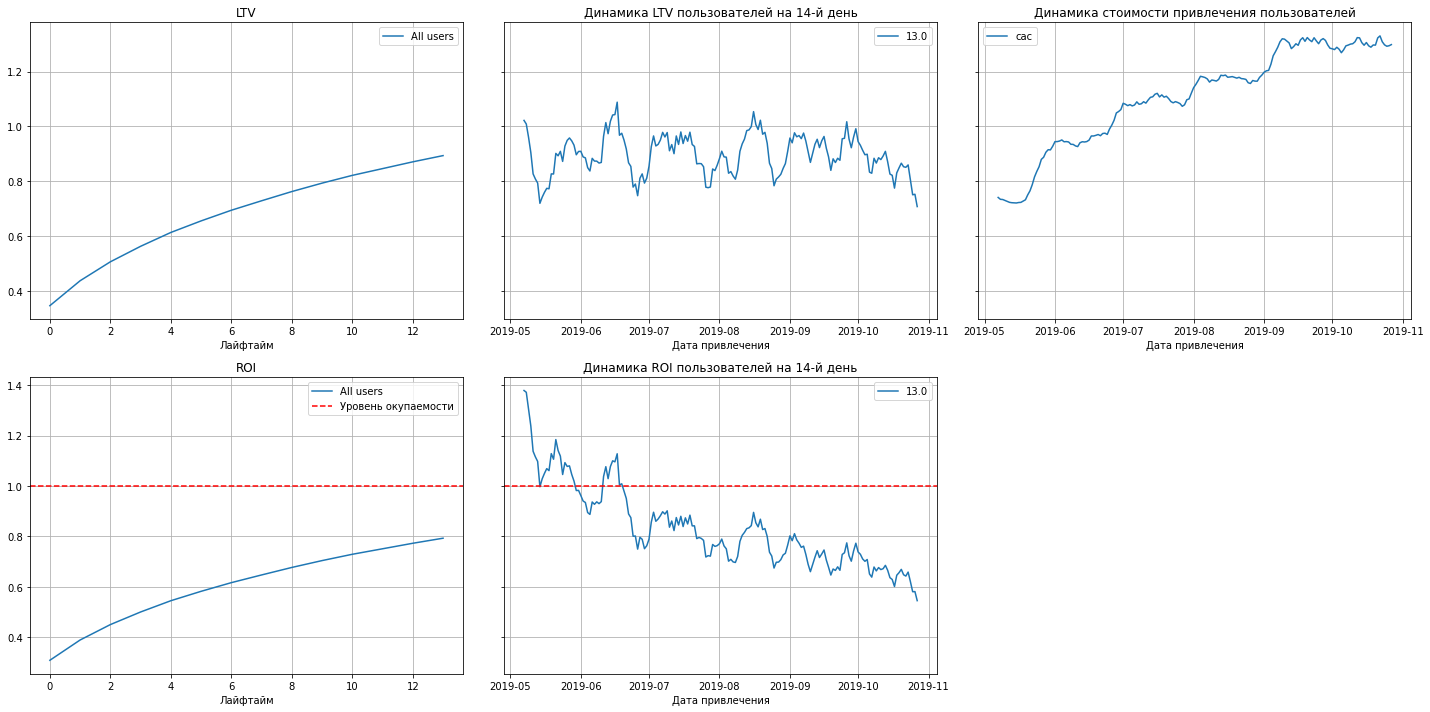

In [47]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    users_q, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 


По графикам можно сделать такие **выводы**:<br>
•	Реклама не окупается. ROI в конце 2 недели — около 80%.<br>
•	CAC растет и стабилизировался в последние 2 месяца.<br>
•	Динамика LTV достаточно стабильна.<br>
•	Динамика ROI идет на спад.<br>

### Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.¶

In [48]:
dimensions = ['device']

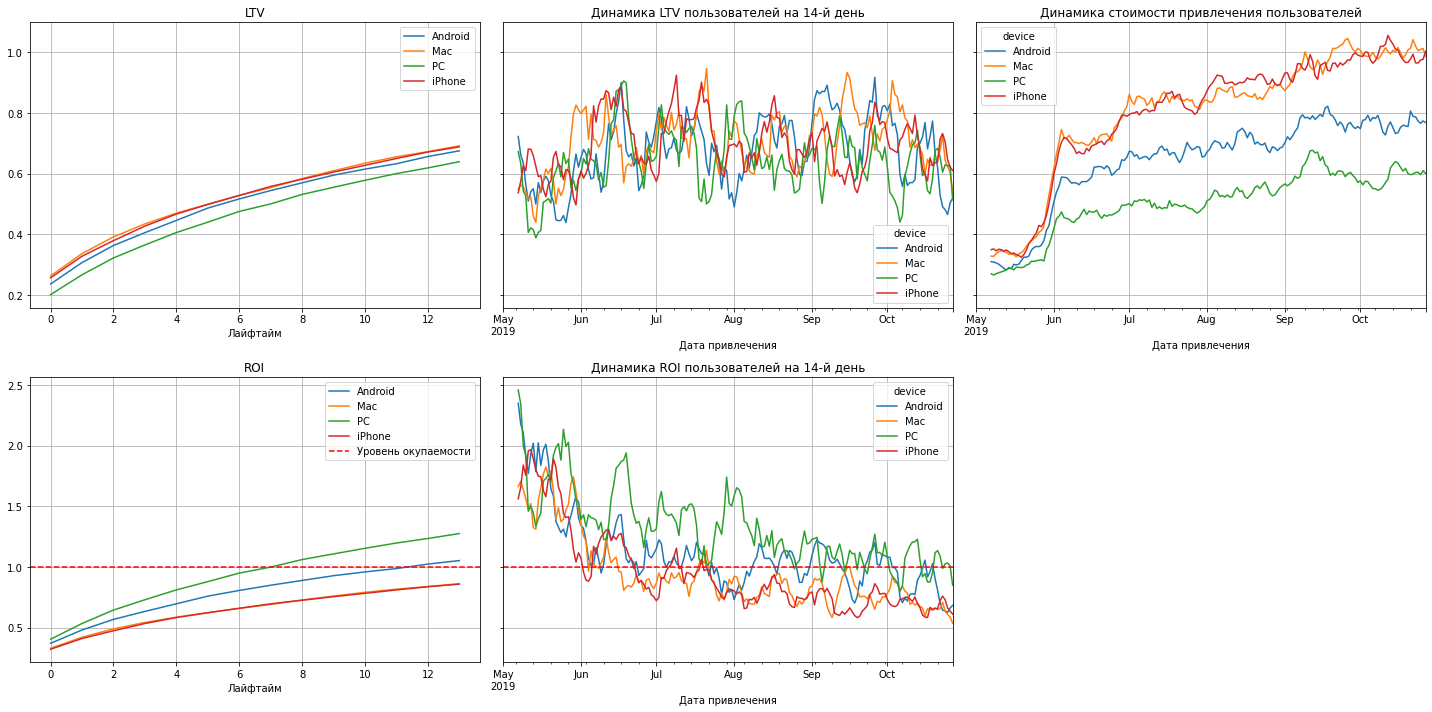

In [49]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    users, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7)

**Вывод**: Пользователи PC стабильно окупаются, пользователи Android находятся на грани окупаемости, а вот владельцы MAC и iPhone — нет.

**Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI без канала 'organic'  и сравним полученный результат.**

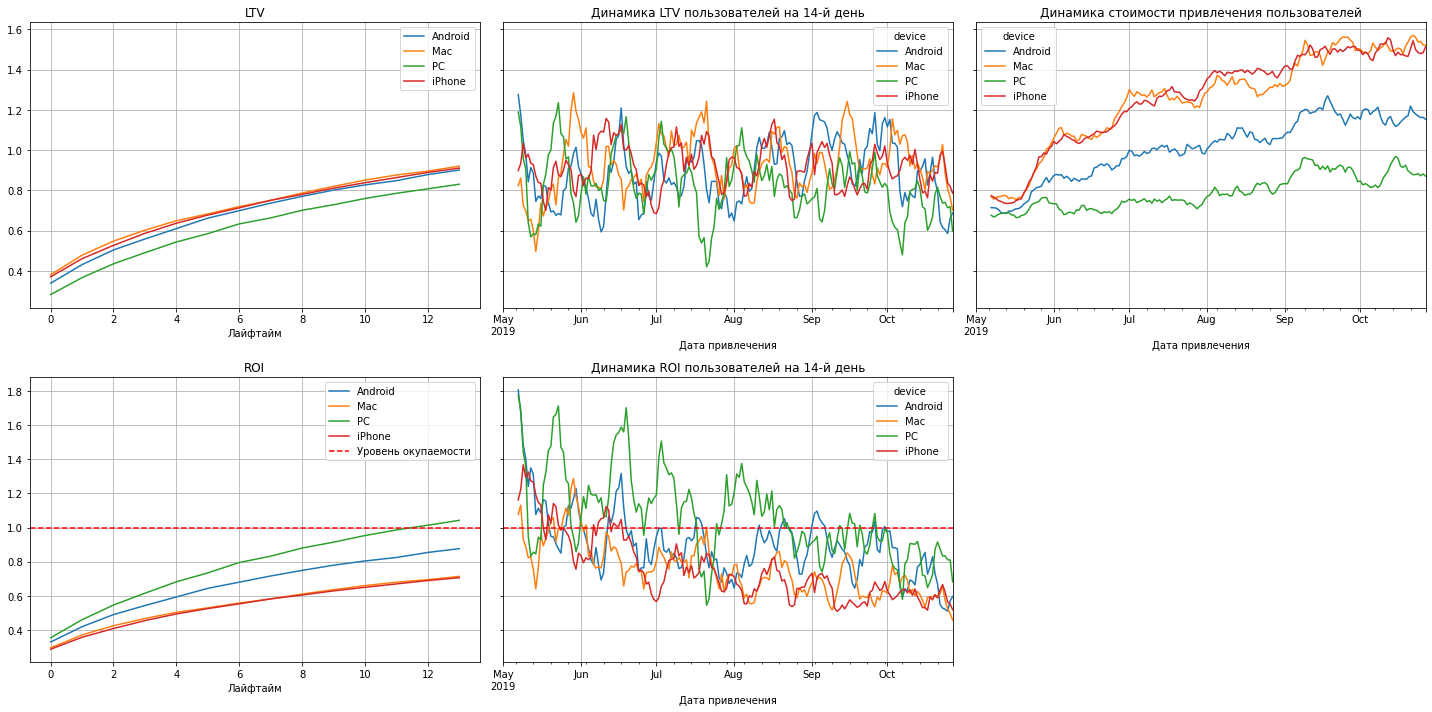

In [50]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    users_q, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7)

**Вывод**: Пользователи PC стабильно окупаются, а вот владельцы Android, MAC и iPhone — нет. Необходимо проверить конверсию и удержание для них.

#### Вывод

Посмотрев на разницу в графиках по окупаемости рекламы с разбивкой ро устройствам с учетом канала 'organic' и без учета канала 'organic' все последующие графики по окупаемости будем строить без учета канала канала 'organic', т.к. на этот канал отсутствуют затраты на рекламу. 

### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [51]:
dimensions = ['channel']

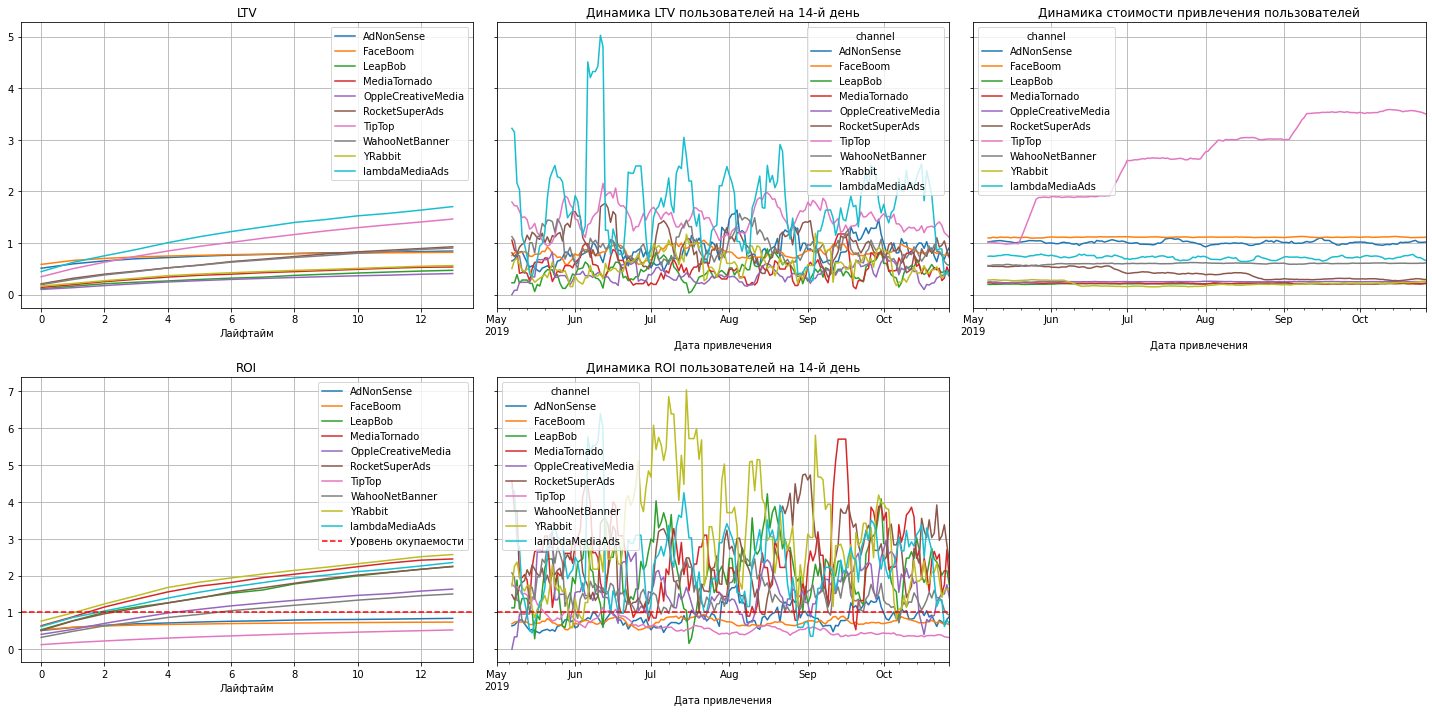

In [52]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    users_q, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7)

**Вывод**: 

•	Реклама окупается по всем рекламным каналам, кроме 'TipTop','FaceBoom', 'AdNonSense'.<br>
•	Стоимость привлечения стабильна для всех рекламных каналов, кроме 'TipTop'. В 'TipTop' очень большие затраты на рекламу и растущие со временем.<br>
•	LTV растет.<br>
•	Лучше всего окупается реклама по каналу 'YRabbit', а вот явным аутсайдером является 'TipTop'.

### Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [53]:
dimensions = ['region']

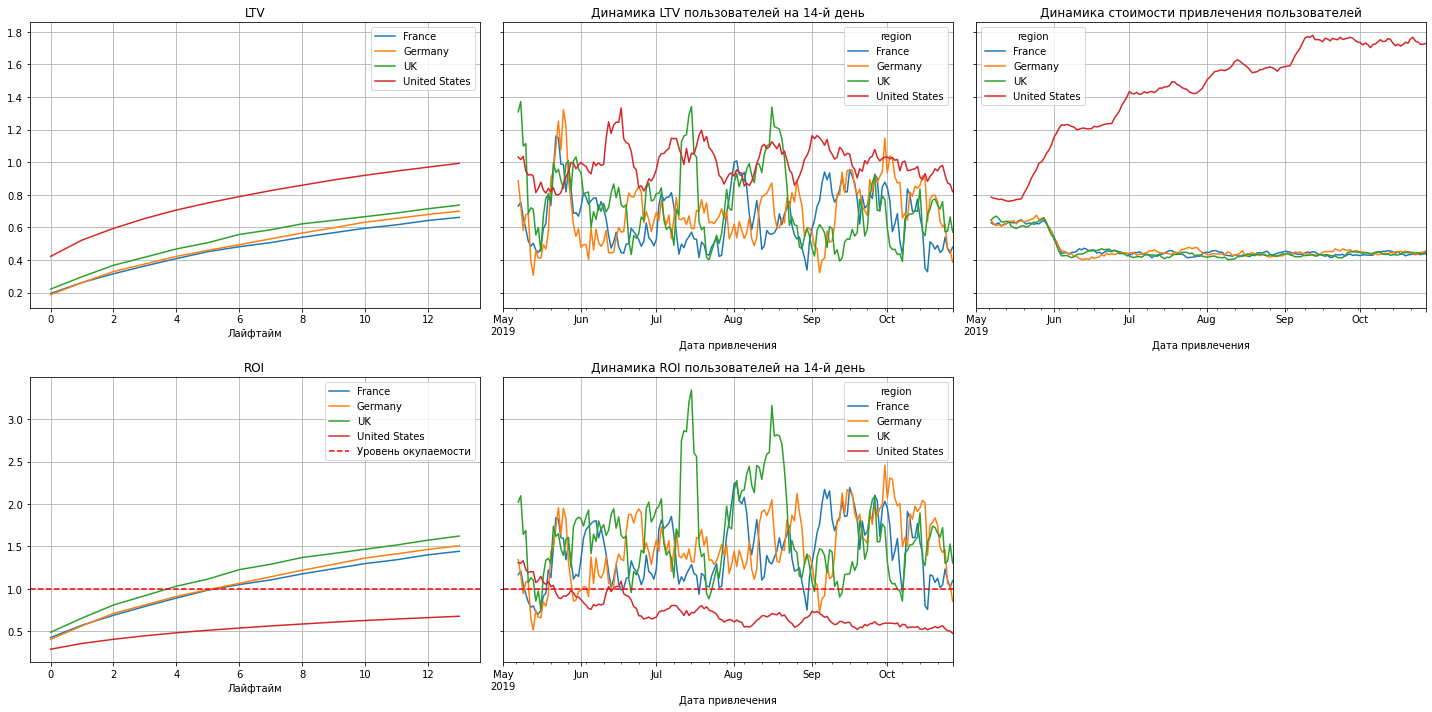

In [54]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    users_q, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7)

**Вывод**: 

•	Реклама окупается во всех странах, кроме США.<br>
•	Стоимость привлечения стабильна и одинакова для всех стран, кроме США. В США очень большие затраты на рекламу.<br>
•	LTV растет и достаточно стабилен.<br>
•	Лучше всего окупается реклама в UK, а вот явным аутсайдером является США.<br>
•	Динамика ROI для США стабильно падает. 

### Постройте и изучите графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.

#### Изучим графики конверсии и удержания с разбивкой по устройствам (без учета канала 'organic')

In [55]:
dimensions = ['device']

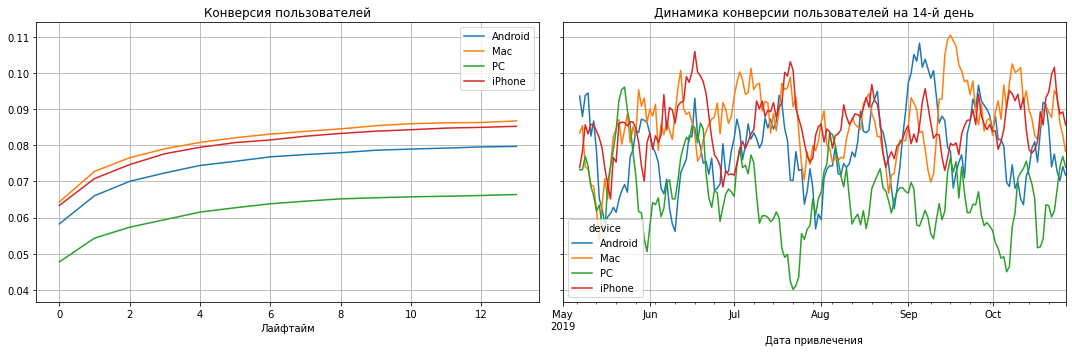

In [56]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    users_q, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод:** Судя по графикам, пользователи устройств конвертируются хорошо.

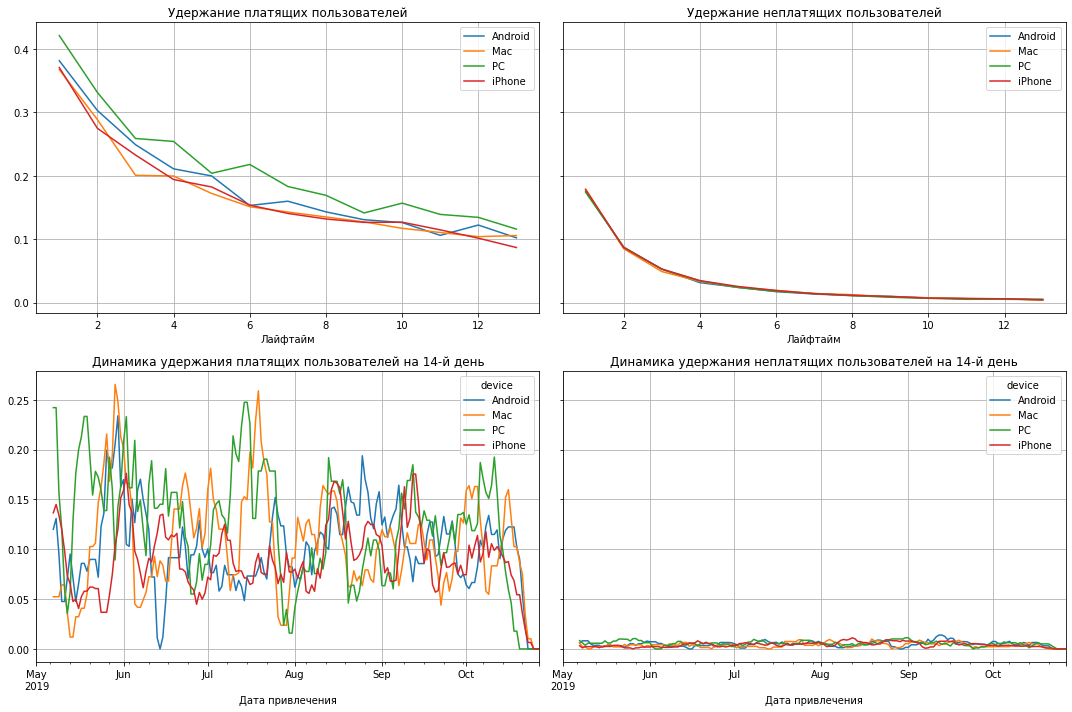

In [57]:
retention_raw, retention_grouped, retention_history = get_retention(
    users_q, sessions, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:** Пользователи всех устройств плохо удерживаются (и платящие, и неплатящие пользователи). Удержание неплатящих убывает быстрее, чем платящих.

#### Изучим графики конверсии и удержания с разбивкой по странам (без учета канала 'organic')

In [58]:
dimensions = ['region']

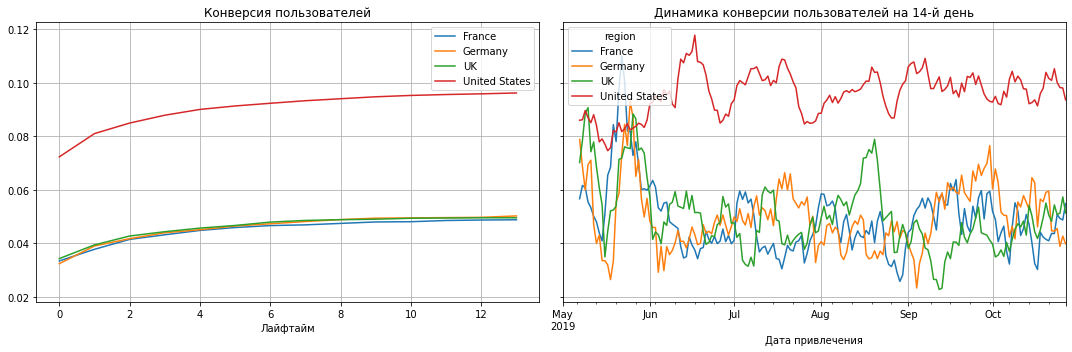

In [59]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    users_q, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод:** Судя по графикам, пользователи по странам конвертируются хорошо. Пользователи США показывают большую динамику, но на них больше затрат в рекламе

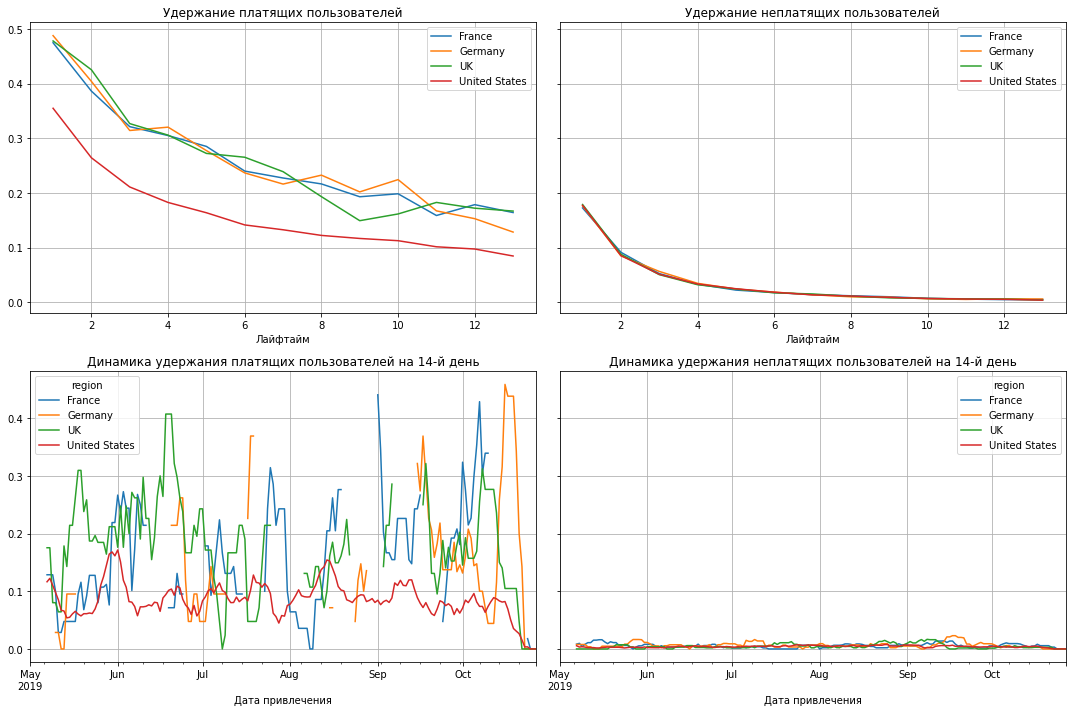

In [60]:
retention_raw, retention_grouped, retention_history = get_retention(
    users_q, sessions, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:** Удержание платящих пользователей из США гораздо ниже, чем у пользователей других стран. Удержание платящих пользователей больше, чем неплатящих. Кривые удержания далеки от эталонных.

#### Изучим графики конверсии и удержания по рекламным каналам (без учета канала 'organic')

In [61]:
dimensions = ['channel']

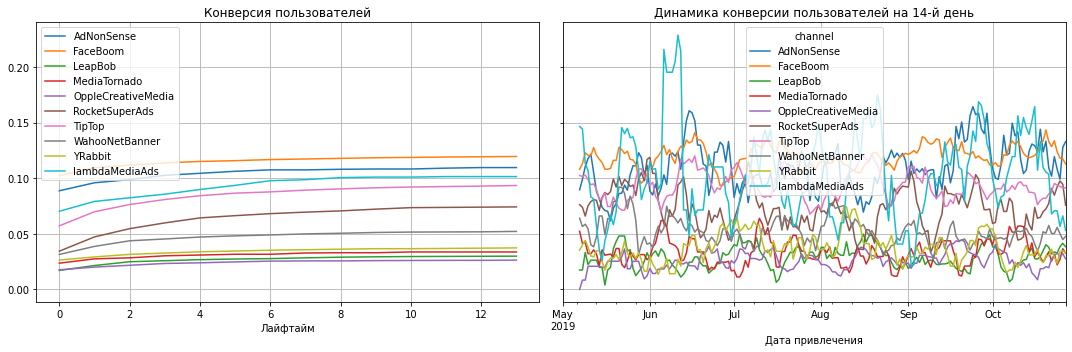

In [62]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    users_q, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод:** Кривые конверсий далеки от эталонных и больше напоминают "прямые". 

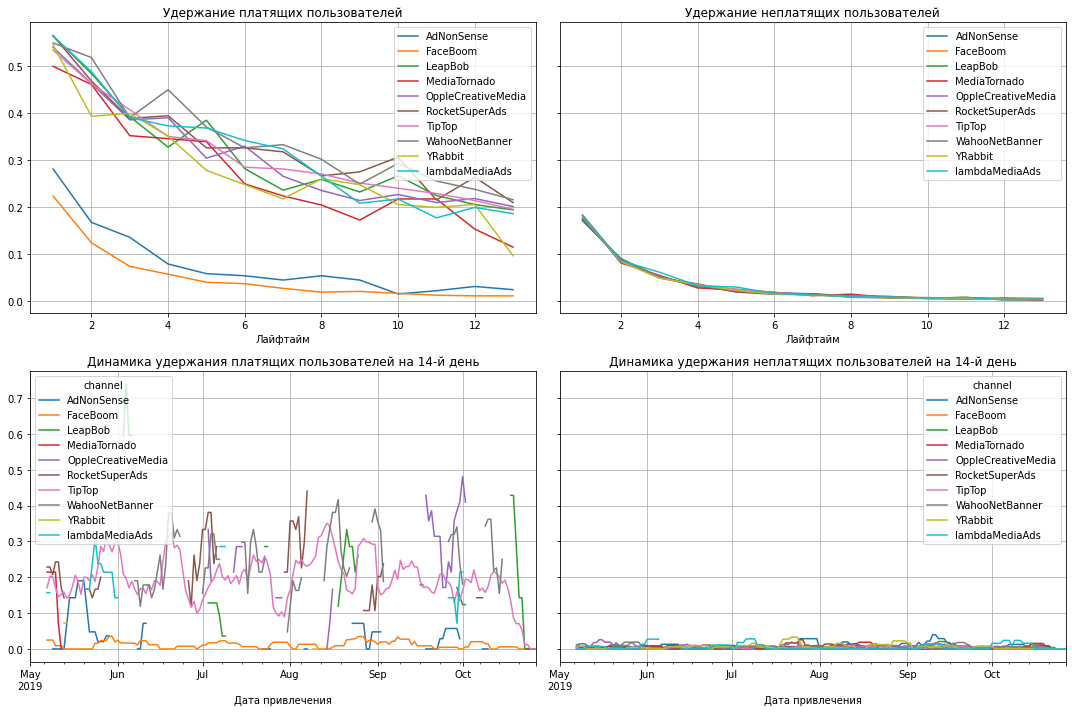

In [63]:
retention_raw, retention_grouped, retention_history = get_retention(
    users_q, sessions, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:** Удержание платящих пользователей по всем каналам, кроме AdNonSense и FaceBoom больше, чем неплатящих. Кривые удержания каналов AdNonSense и FaceBoom близки к эталоннным, но находятся чуть выше кривых удержания неплатящих.

#### Вывод

Графики кривых конверсий независимо от страны, устройств и канала привлечения далеки от эталонных и угол наклона к концу первой недели резко падает и начинает напоминать "прямую". <br>
Кривые удержания платящих пользователей независимо от страны, устройств и канала привлечения находятся выше, чем неплатящих пользователей.

### Вывод

Реклама, направленная на привлечение пользователей в целом не окупается - ROI в конце 2 недели — не превышает 100%.

**Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?**
 - Пользователи PC стабильно окупаются, а вот владельцы Android, MAC и iPhone — нет.
 - Реклама окупается во всех странах, кроме США.
 - Реклама окупается по всем рекламным каналам, кроме 'TipTop','FaceBoom', 'AdNonSense'.<br>
<br>

**Чем могут быть вызваны проблемы окупаемости?**<br>
- Пользователи Android, MAC и iPhone не окупаются, т.к. и них немного худшие результаты по удержанию, чем у РС.<br>
- Реклама не окупается в США, т.к. удержание платящих пользователей из США ниже, чем у пользователей из других стран.<br>
- Реклама не окупается по рекламным каналам 'TipTop','FaceBoom', 'AdNonSense', т.к. у каналов 'FaceBoom', 'AdNonSense' низкие показатели по удержанию (на уровне неплатящих), а у канала 'TipTop' низкая конверсия, не смотря на гораздо большие вливания в рекламу.<br>
<br>

Графики кривых конверсий независимо от страны, устройств и канала привлечения далеки от эталонных и угол наклона к концу первой недели резко падает и начинает напоминать "прямую". <br>
Кривые удержания платящих пользователей независимо от страны, устройств и канала привлечения находятся выше, чем неплатящих пользователей.

##  Вывод

### Причины неэффективности привлечения пользователей.

 - Основной причиной неэффективности привлечения пользователей может являться - само приложение. Возможен недружественный интерфейс или существуют технические трудности у пользователей для осуществления покупок (особенно для пользователей мобильных устройств), или требуется расширенная регистрация.<br>
 - Сильная конкуренция с другими аналогичными приложениями.<br>
 - Причиной неэффективности может быть и сезонность, т.к. у нас данные с 1 мая по 27 октября.<br>

### Рекомендации для отдела маркетинга для повышения эффективности.

- Связаться с разработчиками приложения (перепроверить приложение на технические ошибки, юзабилити, корректность работы на мобильных устройствах).<br>
- Предусмотреть специальные промо-акции для пользователей из США, что одновременно повысит конверсию пользователей устройств MAC и iPhone.<br>
- Уделить больше "внимания" пользователям мобильных устройств.<br>
- Пересмотреть политику распределения рекламного бюджета по каналам привлечения.<br>
- Попробывать выйти с приложением на рынки других стран.<br>

## Общий вывод

Была проведена подготовка данных к анализу.<br>
Cозданы пользовательские профили. Минимальной датой привличения пользователя является 1 мая 2019 года(first), а максимальной - 27 октября 2019(last). Количество уникальных пользователей составляет 149236 человек.<br>
<br>
В приложение приходят пользователи:
- из стран:'United States', 'Germany', 'UK', 'France'. Наибольшее количество платящих пользователей приходится на 'United States' - 6,9%. <br>
- с устройств:'Mac', 'iPhone', 'PC', 'Android'. Наибольшее количество платящих пользователей приходится на 'Mac' - 6,36%. <br>
-  из каналов привличения:'FaceBoom', 'organic', 'AdNonSense', 'YRabbit', 'MediaTornado', 'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner','OppleCreativeMedia', 'lambdaMediaAds'. Наибольшее количество платящих пользователей приходится на 'FaceBoom' - 12,2%.<br><br>

Общая сумма расходов на маркетинг составила 105497.3 у.е., а на одного пользователя - 1,127 у.е. Наибольшие траты пришлись на маркетинг по каналу привлечения 'TipTop'. По остальным каналам траты на рекламу гораздо меньше( в 3 и более раз).<br>
Реклама, направленная на привлечение пользователей в целом не окупается - ROI в конце 2 недели — не превышает 80%.<br>
<br>
 - Пользователи PC стабильно окупаются, а вот владельцы Android, MAC и iPhone — нет<br>
 - Реклама окупается во всех странах, кроме США.<br>
 - Реклама окупается по всем рекламным каналам, кроме 'TipTop','FaceBoom', 'AdNonSense'.<br>
<br>

Графики кривых конверсий независимо от страны, устройств и канала привлечения далеки от эталонных и угол наклона к концу первой недели резко падает и кривые начинают напоминать "прямую".<br>
Кривые удержания платящих пользователей независимо от страны, устройств и канала привлечения находятся выше, чем неплатящих пользователей.<br>
<br>
Обозначены основные причины неэффективности привлечения пользователей и даны рекомендации для отдела маркетинга для повышения эффективности